In [32]:
# 1.Import data dari csv

In [84]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("data_test.csv")
df

created_at               id_str  \
0    Sat Feb 10 23:30:48 +0000 2024  1756460740138119204   
1    Sat Feb 10 23:30:23 +0000 2024  1756460633535766878   
2    Sat Feb 10 23:30:17 +0000 2024  1756460610106413545   
3    Sat Feb 10 23:30:00 +0000 2024  1756460540531208457   
4    Sat Feb 10 23:29:44 +0000 2024  1756460470264090668   
..                              ...                  ...   
541  Fri Feb 09 23:11:32 +0000 2024  1756093502600147146   
542  Fri Feb 09 23:11:21 +0000 2024  1756093457985388779   
543  Fri Feb 09 23:10:00 +0000 2024  1756093116237389849   
544  Fri Feb 09 23:09:17 +0000 2024  1756092936113267194   
545  Fri Feb 09 23:08:42 +0000 2024  1756092789165785325   

                                             full_text  quote_count  \
0    @geriisme Ini bisa basis partai, financing, ak...            0   
1    Hallo semuanya!!!! Tak terasa Pemilihan Legisl...            0   
2    2025   Anis presiden  Kader partai pendukungny...            0   
3    @calunaeruby @losta_masta_ @peachyvann @mapedo...            0   
4    Udah masuk masa tenang tapi cuma ngingetin, ca...            0   
..                                                 ...          ...   
541  @Rapdo5 @Miduk17 bukan hebat tp culas dan lici...            0   
542  @KakekHalal Kalau melalui proses Pemilu Langsu...            0   
543  Kenalan yuk dengan Caleg DPR RI Partai Demokra...            0   
544  @sunprintme aku tempelin sticker gede ya, stic...            0   
545  @Twillight_Loid @GusbacheV Hebat. Jokowi bener...            0   

     reply_count  retweet_count  favorite_count lang          user_id_str  \
0              0              0               0   in  1613742953473900546   
1              0              0               0   in  1172089528393203712   
2              0              0               0   in  1482641858514022404   
3              0              0               1   in  1481882706233688064   
4              0              0               0   in             83742072   
..           ...            ...             ...  ...                  ...   
541            0              0               0   in  1538715717838974976   
542            0              0               4   in  1466979738560258049   
543            0              0               1   in            284830933   
544            1              0               0   in  1742568163601166336   
545            0              0               2   in  1492510742817681409   

     conversation_id_str        username  \
0    1756382503865327916         kwaier_   
1    1756460633535766878      MudiBanten   
2    1756460610106413545        jogjaeth   
3    1755207806284931256        Blokshia   
4    1756460470264090668         ofuku89   
..                   ...             ...   
541  1755995641363534093  MsElva10530471   
542  1755993623945220130   Aryadwiwarna1   
543  1756093116237389849     Demokrat_TV   
544  1756005949641462263        vaneelya   
545  1755978097164517699    AbdulRozakUB   

                                             tweet_url  
0    https://twitter.com/kwaier_/status/17564607401...  
1    https://twitter.com/MudiBanten/status/17564606...  
2    https://twitter.com/jogjaeth/status/1756460610...  
3    https://twitter.com/Blokshia/status/1756460540...  
4    https://twitter.com/ofuku89/status/17564604702...  
..                                                 ...  
541  https://twitter.com/MsElva10530471/status/1756...  
542  https://twitter.com/Aryadwiwarna1/status/17560...  
543  https://twitter.com/Demokrat_TV/status/1756093...  
544  https://twitter.com/vaneelya/status/1756092936...  
545  https://twitter.com/AbdulRozakUB/status/175609...  

[546 rows x 12 columns]

In [86]:
df = df[[ 'created_at','full_text','user_id_str']]
df

created_at  \
0    Sat Feb 10 23:30:48 +0000 2024   
1    Sat Feb 10 23:30:23 +0000 2024   
2    Sat Feb 10 23:30:17 +0000 2024   
3    Sat Feb 10 23:30:00 +0000 2024   
4    Sat Feb 10 23:29:44 +0000 2024   
..                              ...   
541  Fri Feb 09 23:11:32 +0000 2024   
542  Fri Feb 09 23:11:21 +0000 2024   
543  Fri Feb 09 23:10:00 +0000 2024   
544  Fri Feb 09 23:09:17 +0000 2024   
545  Fri Feb 09 23:08:42 +0000 2024   

                                             full_text          user_id_str  
0    @geriisme Ini bisa basis partai, financing, ak...  1613742953473900546  
1    Hallo semuanya!!!! Tak terasa Pemilihan Legisl...  1172089528393203712  
2    2025   Anis presiden  Kader partai pendukungny...  1482641858514022404  
3    @calunaeruby @losta_masta_ @peachyvann @mapedo...  1481882706233688064  
4    Udah masuk masa tenang tapi cuma ngingetin, ca...             83742072  
..                                                 ...                  ...  
541  @Rapdo5 @Miduk17 bukan hebat tp culas dan lici...  1538715717838974976  
542  @KakekHalal Kalau melalui proses Pemilu Langsu...  1466979738560258049  
543  Kenalan yuk dengan Caleg DPR RI Partai Demokra...            284830933  
544  @sunprintme aku tempelin sticker gede ya, stic...  1742568163601166336  
545  @Twillight_Loid @GusbacheV Hebat. Jokowi bener...  1492510742817681409  

[546 rows x 3 columns]

In [87]:
# 2.cleaning data

In [88]:
df.shape

(546, 3)

In [89]:
df.duplicated().sum()

33

In [90]:
df = df.drop_duplicates(subset=['full_text'])

In [91]:
df.duplicated().sum()

0

In [92]:
df.isnull().sum()

created_at     0
full_text      0
user_id_str    0
dtype: int64

In [93]:
df.shape

(513, 3)

In [94]:
def clean_twitter_text(text):
    # Menghapus karakter @mentions, #hastag, dan url
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text)

    return text

# Memanggil fungsi clean_twitter_text() setelah didefinisikan
df.loc[:, 'full_text'] = df['full_text'].apply(clean_twitter_text)


In [95]:
df.loc[:, 'full_text'] = df['full_text'].str.lower()
df

created_at  \
0    Sat Feb 10 23:30:48 +0000 2024   
1    Sat Feb 10 23:30:23 +0000 2024   
2    Sat Feb 10 23:30:17 +0000 2024   
3    Sat Feb 10 23:30:00 +0000 2024   
4    Sat Feb 10 23:29:44 +0000 2024   
..                              ...   
541  Fri Feb 09 23:11:32 +0000 2024   
542  Fri Feb 09 23:11:21 +0000 2024   
543  Fri Feb 09 23:10:00 +0000 2024   
544  Fri Feb 09 23:09:17 +0000 2024   
545  Fri Feb 09 23:08:42 +0000 2024   

                                             full_text          user_id_str  
0     ini bisa basis partai financing akses ke figu...  1613742953473900546  
1    hallo semuanya tak terasa pemilihan legislatif...  1172089528393203712  
2    2025 anis presiden kader partai pendukungnya k...  1482641858514022404  
3     u think hal ky gini pure dr paslon 02 mereka ...  1481882706233688064  
4    udah masuk masa tenang tapi cuma ngingetin cal...             83742072  
..                                                 ...                  ...  
541   bukan hebat tp culas dan licik di angkat dr n...  1538715717838974976  
542   kalau melalui proses pemilu langsung menurut ...  1466979738560258049  
543  kenalan yuk dengan caleg dpr ri partai demokra...            284830933  
544        aku tempelin sticker gede ya sticker partai  1742568163601166336  
545   hebat jokowi bener2 serius buat bangsa ini be...  1492510742817681409  

[513 rows x 3 columns]

In [96]:
# 3.prepocessing data

In [97]:
# 3.1 Normalisasi

In [98]:
df

created_at  \
0    Sat Feb 10 23:30:48 +0000 2024   
1    Sat Feb 10 23:30:23 +0000 2024   
2    Sat Feb 10 23:30:17 +0000 2024   
3    Sat Feb 10 23:30:00 +0000 2024   
4    Sat Feb 10 23:29:44 +0000 2024   
..                              ...   
541  Fri Feb 09 23:11:32 +0000 2024   
542  Fri Feb 09 23:11:21 +0000 2024   
543  Fri Feb 09 23:10:00 +0000 2024   
544  Fri Feb 09 23:09:17 +0000 2024   
545  Fri Feb 09 23:08:42 +0000 2024   

                                             full_text          user_id_str  
0     ini bisa basis partai financing akses ke figu...  1613742953473900546  
1    hallo semuanya tak terasa pemilihan legislatif...  1172089528393203712  
2    2025 anis presiden kader partai pendukungnya k...  1482641858514022404  
3     u think hal ky gini pure dr paslon 02 mereka ...  1481882706233688064  
4    udah masuk masa tenang tapi cuma ngingetin cal...             83742072  
..                                                 ...                  ...  
541   bukan hebat tp culas dan licik di angkat dr n...  1538715717838974976  
542   kalau melalui proses pemilu langsung menurut ...  1466979738560258049  
543  kenalan yuk dengan caleg dpr ri partai demokra...            284830933  
544        aku tempelin sticker gede ya sticker partai  1742568163601166336  
545   hebat jokowi bener2 serius buat bangsa ini be...  1492510742817681409  

[513 rows x 3 columns]

In [99]:
norm = {
    'emang': 'memang',
    'yg': 'yang',
    'tau': 'tahu',
    'itu': 'itu',
    'ngga': 'tidak',
    'gak': 'tidak',
    'udah': 'sudah',
    'ngomong': 'berbicara',
    'sampe': 'sampai',
    'tsb': 'tersebut',
    'aja': 'saja',
    'gaess': 'teman-teman',
    'gue': 'saya',
    'bgt': 'banget',
    'bro': 'sobat',
    'loh': 'lho',
    'klo': 'kalau',
    'gtu': 'begitu',
    'wkwkwk': 'tertawa',
    'mbak': 'kakak perempuan',
    'masnya': 'kakak laki-laki',
    'nih': 'ini',
    'sbg': 'sebagai',
    'ampun': 'maaf',
    'tp': 'tetapi',
    'krna': 'karena',
    'jd': 'jadi',
    'kl': 'kalau',
    'klh': 'kalah',
    'bs': 'bisa',
    'dlu': 'dulu',
    'cm': 'hanya',
    'ntn': 'menonton',
    'blm': 'belum',
    'klu': 'kalau',
    'skrg': 'sekarang',
    'mu': 'dirimu',
    'kmu': 'kamu',
    'dgn': 'dengan',
    'nyinyir': 'bercanda',
    'sosmed': 'media sosial',
    'mk': 'mahkamah konstitusi',
    'nyerah': 'menyerah',
    'ngetren': 'populer',
    'kwkwk': 'tertawa',
    'klw': 'kalau',
    'gmn': 'bagaimana',
    'gaada': 'tidak ada',
    'mjd': 'menjadi',
    'yaa': 'ya',
    'jg': 'juga',
    'biar': 'agar',
    'masi': 'masih',
    'jgn': 'jangan',
    'emg': 'memang',
    'hmm': 'hmm',
    'bodoamat': 'tidak peduli',
    'kayak': 'seperti',
    'apapun': 'apapun',
    'ga': 'tidak',
    'muji': 'memuji',
    'td': 'tadi',
    'napa': 'kenapa',
    'ketum': 'ketua umum',
    'ngegas': 'bersikap tegas',
    'bener': 'benar',
    'lg': 'lagi',
    'skrng': 'sekarang',
    'knp': 'kenapa',
    'yaudah': 'ya sudah',
    'tdk': 'tidak',
    'pdhl': 'padahal',
    'bngt': 'banget',
    'kasian': 'kasihan',
    'dasar': 'dasar',
    'akuny': 'akunnya',
    'kok': 'kenapa',
    'paslon': 'pasangan calon',
    'pemilu': 'pemilihan umum',
    'pilpres': 'pemilihan presiden',
    'caleg': 'calon legislatif',
    'timses': 'tim sukses',
    'tpi': 'tetapi',
    'lah': 'lah',
    'ngaku': 'mengaku',
    'dpr': 'dewan perwakilan rakyat',
    'dprd': 'dewan perwakilan rakyat daerah',
    'dpd': 'dewan perwakilan daerah',
    'ngasih': 'memberikan',
    'doang': 'saja',
    'pdip': 'partai demokrasi indonesia perjuangan',
    'kepantasan': 'kelayakan',
    'jaman': 'zaman',
    'rebo': 'rabu',
    'tmsk': 'termasuk',
    'lu': 'kamu',
    'palingan': 'paling',
    'lebih': 'lebih',
    'jelasin': 'jelaskan',
    'ini': 'ini',
    'kalimatnya': 'kalimatnya',
    'sm': 'sama',
    'sklrg': 'sekarang',
    'diatas': 'di atas',
    'bnyk': 'banyak',
    'jd': 'jadi',
    'bocor': 'bocor',
    'sbb': 'sebab',
    'bodoamat': 'tidak peduli',
    'bgst': 'bangsat',
    'pd': 'pada',
    'sma': 'sama',
    'bego': 'bodoh',
    'sbgi': 'sebagai',
    'blm': 'belum',
    'knp': 'kenapa',
    'gitu': 'begitu',
    'lucu2': 'lucu-lucu',
    'sih': 'sih',
    'mikir': 'berpikir',
    'lu': 'kamu',
    'gini': 'begini',
    'apaan': 'apa',
    'kgk': 'tidak',
    'dr': 'dari',
    'tuk': 'untuk',
    'nah': 'nah',
    'yaudah': 'ya sudah',
    'nntn': 'menonton',
    'tahka': 'tahta',
    'ngapa' : 'mengapa',
    'isteri' : 'istri',
    'alm'   : 'almarhum',
    'utk'   : 'untuk',
    'btw' : 'omong-omong',
    'pks' : 'Partai Keadilan Sejahtera',
    'ngebolehin' : 'mengizinkan',
    'ttg': 'tentang',
    'gede': 'besar',
    'rebu': 'ribu',
}

def normalisasi_text(text):
    if isinstance(text, str):
        words = text.split()
        normalized_words = [norm[word] if word in norm else word for word in words]
        return ' '.join(normalized_words)
    else:
        return text

# Melakukan normalisasi pada kolom 'full_text'
df.loc[:, 'full_text'] = df['full_text'].apply(normalisasi_text)
df


created_at  \
0    Sat Feb 10 23:30:48 +0000 2024   
1    Sat Feb 10 23:30:23 +0000 2024   
2    Sat Feb 10 23:30:17 +0000 2024   
3    Sat Feb 10 23:30:00 +0000 2024   
4    Sat Feb 10 23:29:44 +0000 2024   
..                              ...   
541  Fri Feb 09 23:11:32 +0000 2024   
542  Fri Feb 09 23:11:21 +0000 2024   
543  Fri Feb 09 23:10:00 +0000 2024   
544  Fri Feb 09 23:09:17 +0000 2024   
545  Fri Feb 09 23:08:42 +0000 2024   

                                             full_text          user_id_str  
0    ini bisa basis partai financing akses ke figur...  1613742953473900546  
1    hallo semuanya tak terasa pemilihan legislatif...  1172089528393203712  
2    2025 anis presiden kader partai pendukungnya k...  1482641858514022404  
3    u think hal ky begini pure dari pasangan calon...  1481882706233688064  
4    sudah masuk masa tenang tapi cuma ngingetin ca...             83742072  
..                                                 ...                  ...  
541  bukan hebat tetapi culas dan licik di angkat d...  1538715717838974976  
542  kalau melalui proses pemilihan umum langsung m...  1466979738560258049  
543  kenalan yuk dengan calon legislatif dewan perw...            284830933  
544       aku tempelin sticker besar ya sticker partai  1742568163601166336  
545  hebat jokowi bener2 serius buat bangsa ini bel...  1492510742817681409  

[513 rows x 3 columns]

In [100]:
#3.2 Stopword

In [101]:
!pip install Sastrawi

In [102]:
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# Tambahkan stop words tambahan
more_stop_words = ["tidak"]

# Buat stop word remover factory
factory = StopWordRemoverFactory()
stop_words = factory.get_stop_words()
stop_words.extend(more_stop_words)

# Buat array dictionary dengan stop words baru
new_array = ArrayDictionary(stop_words)
stop_word_remover = StopWordRemover(new_array)

# Fungsi untuk menghapus stop words
def remove_stop_words(text):
    return stop_word_remover.remove(text)

# Menggunakan .loc untuk menghindari SettingWithCopyWarning
df.loc[:, 'full_text'] = df['full_text'].apply(remove_stop_words)
df


created_at  \
0    Sat Feb 10 23:30:48 +0000 2024   
1    Sat Feb 10 23:30:23 +0000 2024   
2    Sat Feb 10 23:30:17 +0000 2024   
3    Sat Feb 10 23:30:00 +0000 2024   
4    Sat Feb 10 23:29:44 +0000 2024   
..                              ...   
541  Fri Feb 09 23:11:32 +0000 2024   
542  Fri Feb 09 23:11:21 +0000 2024   
543  Fri Feb 09 23:10:00 +0000 2024   
544  Fri Feb 09 23:09:17 +0000 2024   
545  Fri Feb 09 23:08:42 +0000 2024   

                                             full_text          user_id_str  
0    bisa basis partai financing akses figure milit...  1613742953473900546  
1    hallo semuanya tak terasa pemilihan legislatif...  1172089528393203712  
2    2025 anis presiden kader partai pendukungnya k...  1482641858514022404  
3    u think ky begini pure pasangan calon 02 kan p...  1481882706233688064  
4    masuk masa tenang cuma ngingetin calon legisla...             83742072  
..                                                 ...                  ...  
541  bukan hebat culas licik angkat nol smpai berku...  1538715717838974976  
542  kalau melalui proses pemilihan umum langsung s...  1466979738560258049  
543  kenalan yuk calon legislatif dewan perwakilan ...            284830933  
544          aku tempelin sticker besar sticker partai  1742568163601166336  
545  hebat jokowi bener2 serius buat bangsa beliyau...  1492510742817681409  

[513 rows x 3 columns]

In [103]:
# 3.3 Tokenize

In [104]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Unduh data punkt
nltk.download('punkt')
# Menggunakan .loc untuk menghindari SettingWithCopyWarning
df.loc[:, 'tokenized'] = df['full_text'].apply(word_tokenize)

# Tampilkan hasil tokenisasi
df[['full_text', 'tokenized']]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rizqi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Rizqi\AppData\Local\Temp\ipykernel_1452\2370743566.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'tokenized'] = df['full_text'].apply(word_tokenize)


full_text  \
0    bisa basis partai financing akses figure milit...   
1    hallo semuanya tak terasa pemilihan legislatif...   
2    2025 anis presiden kader partai pendukungnya k...   
3    u think ky begini pure pasangan calon 02 kan p...   
4    masuk masa tenang cuma ngingetin calon legisla...   
..                                                 ...   
541  bukan hebat culas licik angkat nol smpai berku...   
542  kalau melalui proses pemilihan umum langsung s...   
543  kenalan yuk calon legislatif dewan perwakilan ...   
544          aku tempelin sticker besar sticker partai   
545  hebat jokowi bener2 serius buat bangsa beliyau...   

                                             tokenized  
0    [bisa, basis, partai, financing, akses, figure...  
1    [hallo, semuanya, tak, terasa, pemilihan, legi...  
2    [2025, anis, presiden, kader, partai, pendukun...  
3    [u, think, ky, begini, pure, pasangan, calon, ...  
4    [masuk, masa, tenang, cuma, ngingetin, calon, ...  
..                                                 ...  
541  [bukan, hebat, culas, licik, angkat, nol, smpa...  
542  [kalau, melalui, proses, pemilihan, umum, lang...  
543  [kenalan, yuk, calon, legislatif, dewan, perwa...  
544   [aku, tempelin, sticker, besar, sticker, partai]  
545  [hebat, jokowi, bener2, serius, buat, bangsa, ...  

[513 rows x 2 columns]

In [105]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Fungsi untuk melakukan stemming pada setiap kalimat
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

# Mengambil kolom yang diperlukan
df = df[['created_at', 'full_text', 'user_id_str']]

# Melakukan stemming pada kolom 'full_text'
df['stemmed_text'] = df['full_text'].apply(stemming)

# Menyimpan hasil ke dalam file CSV dengan kolom yang diminta
df.to_csv('data_test_fix.csv', index=False)

# Cetak hasil sebelum dan sesudah stemming setelah 10 baris pertama di-Stem
stemmed_df = df.head(10)
for index, row in stemmed_df.iterrows():
    print("Sebelum stemming:", row['full_text'])
    print("Sesudah stemming:", row['stemmed_text'])
    print()

Sebelum stemming: bisa basis partai financing akses figure militansi sejarah budaya menarik kalau liat pemilihan umum philippines taun lalu rame banget milih leni robredo berhasil dapet simpati semua kalangan masih kalah marcosduterte but lets see on 14
Sesudah stemming: bisa basis partai financing akses figure militansi sejarah budaya tarik kalau liat pilih umum philippines taun lalu rame banget milih leni robredo hasil dapet simpati semua kalang masih kalah marcosduterte but lets see on 14

Sebelum stemming: hallo semuanya tak terasa pemilihan legislatif tinggal menghitung hari yah jangan lupa tanggal 14 februari datang tps coblos ricky kurniawan chairul calon legislatif dewan perwakilan rakyat daerah provinsi banten dapil tangerang c nomor urut 1 partai demokrat semangat
Sesudah stemming: hallo semua tak asa pilih legislatif tinggal hitung hari yah jangan lupa tanggal 14 februari datang tps coblos ricky kurniawan chairul calon legislatif dewan wakil rakyat daerah provinsi banten dap

In [61]:
import pandas as pd

# Baca file CSV ke DataFrame
data = pd.read_csv("labeled_data.csv", index_col=False)

# Ubah nilai kolom label_text_number
data['label_text_number'] = data['label_text_number'].replace({1: 'positif', 2: 'negatif', 3: 'netral'})

# Tampilkan DataFrame yang sudah diubah
print(data)

# Simpan DataFrame yang sudah diubah ke file CSV baru
data.to_csv('labeled_data_updated.csv', index=False)


                          created_at  \
0     Sat Feb 10 23:59:55 +0000 2024   
1     Sat Feb 10 23:59:51 +0000 2024   
2     Sat Feb 10 23:59:46 +0000 2024   
3     Sat Feb 10 23:59:34 +0000 2024   
4     Sat Feb 10 23:59:28 +0000 2024   
...                              ...   
1299  Fri Feb 09 23:25:58 +0000 2024   
1300  Fri Feb 09 23:25:56 +0000 2024   
1301  Fri Feb 09 23:23:59 +0000 2024   
1302  Fri Feb 09 23:23:52 +0000 2024   
1303  Fri Feb 09 23:23:29 +0000 2024   

                                              full_text          user_id_str  \
0                tahu partai nya gabener di pilih hadeh  1489144415021322242   
1     bukan tahun 2000an awal orang2 Partai Keadilan...  1358428069845889026   
2     imagine invalidating someones fear and calling...  1334684348184887297   
3     jangan lupa yah teman-teman 2024 pilih partai ...  1679186924685385728   
4     h3 pemilihan umum heran seakan2 jokowi dosanya...            171050686   
...                                    

In [245]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

# Baca data pelatihan dan data uji
data_train = pd.read_csv('labeled_data_updated.csv', index_col=False)
data_test = pd.read_csv('data_test_fix.csv', index_col=False)

# Inisialisasi model Naive Bayes dengan smoothing parameter yang berbeda dan parameter lainnya
model = MultinomialNB(alpha=0.5, fit_prior=False)  # Contoh: menggunakan alpha=0.5 dan fit_prior=False

# Pipeline untuk melakukan TfidfVectorizer dan pemodelan dengan Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),  # Menambahkan pembuatan n-grams dan membatasi jumlah fitur
    ('clf', model)
])

# Pisahkan data pelatihan menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(data_train['stemmed_text'], data_train['label_text'], test_size=0.3, random_state=42)

# Lakukan pelatihan dengan data pelatihan dan evaluasi dengan data validasi
pipeline.fit(X_train, y_train)

# Prediksi label untuk data validasi
val_predictions = pipeline.predict(X_val)

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, val_predictions))

# Hitung dan cetak akurasi
accuracy = (val_predictions == y_val).mean()
print(f'Validation Accuracy: {accuracy}')

# Lakukan pelatihan dengan semua data pelatihan
pipeline.fit(data_train['stemmed_text'], data_train['label_text'])

# Prediksi label untuk data uji
predictions = pipeline.predict(data_test['stemmed_text'])

# Tambahkan kolom prediksi ke data uji
data_test['label_text'] = predictions

# Simpan hasil prediksi ke file baru
data_test.to_csv('data_test_with_predictions_higher_accuracy.csv', index=False)

print("Prediksi untuk data uji telah disimpan dalam 'data_test_with_predictions_higher_accuracy.csv'")


Confusion Matrix:
[[149  21  11]
 [ 74  37  13]
 [ 43  12  32]]
Validation Accuracy: 0.5561224489795918
Prediksi untuk data uji telah disimpan dalam 'data_test_with_predictions_higher_accuracy.csv'


In [236]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Baca data pelatihan dan data uji
data_train = pd.read_csv('labeled_data_updated.csv', index_col=False)
data_test = pd.read_csv('data_test_fix.csv', index_col=False)

# Inisialisasi model Naive Bayes dengan smoothing parameter yang berbeda dan parameter lainnya
model = MultinomialNB(alpha=0.5, fit_prior=False)  # Contoh: menggunakan alpha=0.5 dan fit_prior=False

# Pipeline untuk melakukan TfidfVectorizer dan pemodelan dengan Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),  # Menambahkan pembuatan n-grams dan membatasi jumlah fitur
    ('clf', model)
])

# Pisahkan data pelatihan menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(data_train['stemmed_text'], data_train['label_text'], test_size=0.3, random_state=42)

# Lakukan pelatihan dengan data pelatihan dan evaluasi dengan data validasi
pipeline.fit(X_train, y_train)

# Prediksi label untuk data validasi
val_predictions = pipeline.predict(X_val)

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, val_predictions))

# Hitung dan cetak akurasi
accuracy = (val_predictions == y_val).mean()
print(f'Validation Accuracy: {accuracy}')

# Lakukan pelatihan dengan semua data pelatihan
pipeline.fit(data_train['stemmed_text'], data_train['label_text'])

# Prediksi label untuk data uji
predictions = pipeline.predict(data_test['stemmed_text'])

# Tambahkan kolom prediksi ke data uji
data_test['label_text'] = predictions

# Simpan hasil prediksi ke file baru
data_test.to_csv('data_test_with_predictions_higher_accuracy.csv', index=False)

print("Prediksi untuk data uji telah disimpan dalam 'data_test_with_predictions_higher_accuracy.csv'")

# Menggabungkan teks berdasarkan prediksi sentimen
netral_text = " ".join(data_test[data_test['label_text'] == 'netral']['stemmed_text'])
positif_text = " ".join(data_test[data_test['label_text'] == 'positif']['stemmed_text'])
negatif_text = " ".join(data_test[data_test['label_text'] == 'negatif']['stemmed_text'])

# Fungsi untuk menghitung bobot TF-IDF dan membuat word cloud
def generate_tfidf_wordcloud(texts, title, colormap, filename):
    vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
    tfidf_matrix = vectorizer.fit_transform(texts)
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).tolist()[0]))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap, collocations=False).generate_from_frequencies(tfidf_scores)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(f"{filename}.png")
    plt.clf()

# Menyimpan word cloud untuk setiap sentimen sebagai file terpisah
generate_tfidf_wordcloud([netral_text], 'Word Cloud untuk Sentimen Netral', 'viridis', 'wordcloud_netral')
generate_tfidf_wordcloud([positif_text], 'Word Cloud untuk Sentimen Positif', 'plasma', 'wordcloud_positif')
generate_tfidf_wordcloud([negatif_text], 'Word Cloud untuk Sentimen Negatif', 'inferno', 'wordcloud_negatif')


Confusion Matrix:
[[149  21  11]
 [ 74  37  13]
 [ 43  12  32]]
Validation Accuracy: 0.5561224489795918
Prediksi untuk data uji telah disimpan dalam 'data_test_with_predictions_higher_accuracy.csv'


<Figure size 640x480 with 0 Axes>

In [241]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Baca data pelatihan dan data uji
data_train = pd.read_csv('labeled_data_updated.csv', index_col=False)
data_test = pd.read_csv('data_test_fix.csv', index_col=False)

# Inisialisasi model Naive Bayes dengan smoothing parameter yang berbeda dan parameter lainnya
model = MultinomialNB(alpha=0.5, fit_prior=False)  # Contoh: menggunakan alpha=0.5 dan fit_prior=False

# Pipeline untuk melakukan TfidfVectorizer dan pemodelan dengan Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 1))),  # Menggunakan unigrams saja
    ('clf', model)
])

# Pisahkan data pelatihan menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(data_train['stemmed_text'], data_train['label_text'], test_size=0.3, random_state=42)

# Lakukan pelatihan dengan data pelatihan dan evaluasi dengan data validasi
pipeline.fit(X_train, y_train)

# Prediksi label untuk data validasi
val_predictions = pipeline.predict(X_val)

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, val_predictions))

# Hitung dan cetak akurasi
accuracy = (val_predictions == y_val).mean()
print(f'Validation Accuracy: {accuracy}')

# Lakukan pelatihan dengan semua data pelatihan
pipeline.fit(data_train['stemmed_text'], data_train['label_text'])

# Prediksi label untuk data uji
predictions = pipeline.predict(data_test['stemmed_text'])

# Tambahkan kolom prediksi ke data uji
data_test['label_text'] = predictions

# Simpan hasil prediksi ke file baru
data_test.to_csv('data_test_with_predictions_higher_accuracy.csv', index=False)

print("Prediksi untuk data uji telah disimpan dalam 'data_test_with_predictions_higher_accuracy.csv'")

# Mengambil kata-kata yang digunakan dalam TfidfVectorizer dan bobot TF-IDF
vectorizer = pipeline.named_steps['tfidf']
feature_names = vectorizer.get_feature_names_out()
tfidf_matrix = vectorizer.transform(data_train['stemmed_text'])
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Sum TF-IDF scores across all documents

# Membuat DataFrame dari fitur dan skor TF-IDF
tfidf_df = pd.DataFrame({'Term': feature_names, 'TF-IDF': tfidf_scores})

# Menyimpan DataFrame ke dalam file CSV
tfidf_df.to_csv('tfidf_features.csv', index=False)

print("Fitur TF-IDF telah disimpan dalam 'tfidf_features.csv'")

# Menggabungkan teks berdasarkan prediksi sentimen
netral_text = " ".join(data_test[data_test['label_text'] == 'netral']['stemmed_text'])
positif_text = " ".join(data_test[data_test['label_text'] == 'positif']['stemmed_text'])
negatif_text = " ".join(data_test[data_test['label_text'] == 'negatif']['stemmed_text'])

# Fungsi untuk menghitung bobot TF-IDF dan membuat word cloud
def generate_tfidf_wordcloud(texts, title, colormap, filename):
    vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 1))  # Menggunakan unigrams saja
    tfidf_matrix = vectorizer.fit_transform(texts)
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).tolist()[0]))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap, collocations=False).generate_from_frequencies(tfidf_scores)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(f"{filename}.png")
    plt.clf()

# Menyimpan word cloud untuk setiap sentimen sebagai file terpisah
generate_tfidf_wordcloud([netral_text], 'Word Cloud untuk Sentimen Netral', 'viridis', 'wordcloud_netral')
generate_tfidf_wordcloud([positif_text], 'Word Cloud untuk Sentimen Positif', 'plasma', 'wordcloud_positif')
generate_tfidf_wordcloud([negatif_text], 'Word Cloud untuk Sentimen Negatif', 'inferno', 'wordcloud_negatif')


Confusion Matrix:
[[138  27  16]
 [ 62  39  23]
 [ 40  13  34]]
Validation Accuracy: 0.5382653061224489
Prediksi untuk data uji telah disimpan dalam 'data_test_with_predictions_higher_accuracy.csv'
Fitur TF-IDF telah disimpan dalam 'tfidf_features.csv'


<Figure size 640x480 with 0 Axes>

In [247]:
import pandas as pd

# Membaca data dari file CSV
data = pd.read_csv("data_test_with_predictions_higher_accuracy.csv")

# Menghitung jumlah data dengan masing-masing sentimen
sentiment_counts = data['label_text'].value_counts()

# Mencetak jumlah data dengan masing-masing sentimen
print("Jumlah data dengan sentimen:")
print("Netral:", sentiment_counts['netral'])
print("Positif:", sentiment_counts['positif'])
print("Negatif:", sentiment_counts['negatif'])


Jumlah data dengan sentimen:
Netral: 96
Positif: 87
Negatif: 330


In [243]:
import pandas as pd

# Membaca data dari file CSV
labeled_data = pd.read_csv("labeled_data_updated.csv")
predicted_data = pd.read_csv("data_test_with_predictions_higher_accuracy.csv")

# Menggabungkan data dengan menambahkan data dari file kedua di bawah data dari file pertama
combined_data = pd.concat([labeled_data, predicted_data], ignore_index=True)

# Menyimpan data gabungan ke dalam file CSV baru
combined_data.to_csv("combined_data.csv", index=False)

print("Data telah digabungkan dan disimpan ke dalam 'combined_data.csv'")


Data telah digabungkan dan disimpan ke dalam 'combined_data.csv'


C:\Users\Rizqi\AppData\Local\Temp\ipykernel_1452\1594887086.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiments, y=counts, palette='viridis')


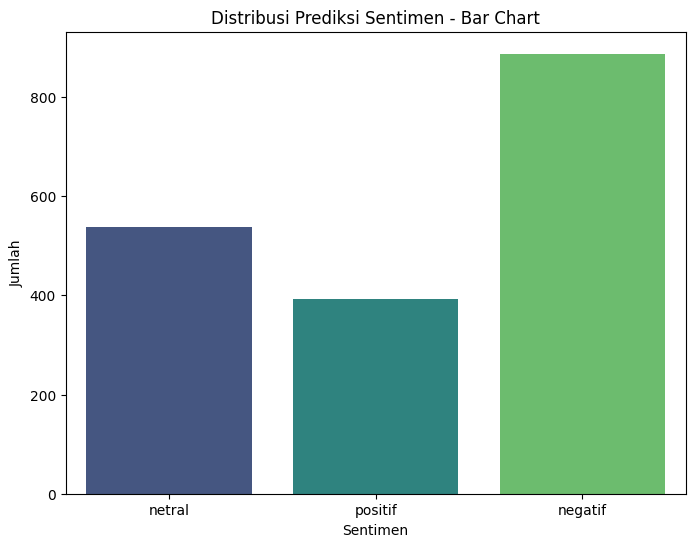

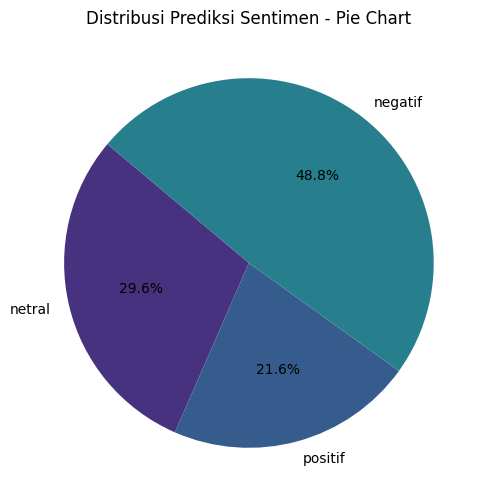

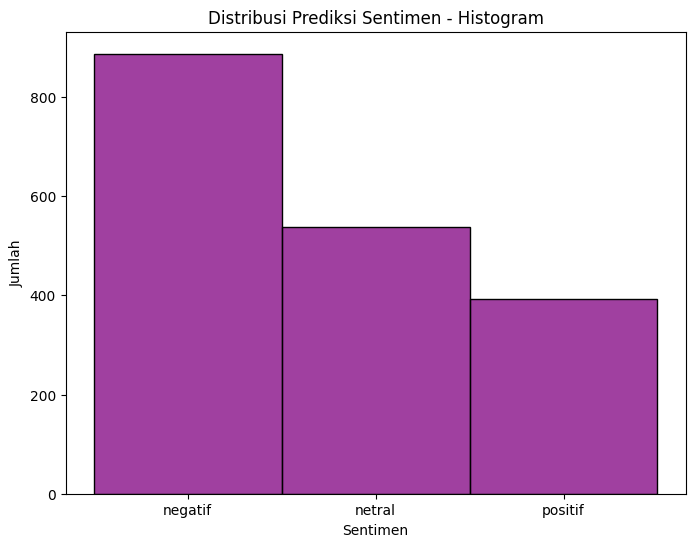

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
data = pd.read_csv("combined_data.csv")

# Menghitung jumlah data dengan masing-masing sentimen
sentiment_counts = data['label_text'].value_counts()

# Menyiapkan data untuk visualisasi
sentiments = ['netral', 'positif', 'negatif']
counts = [sentiment_counts['netral'], sentiment_counts['positif'], sentiment_counts['negatif']]

# Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiments, y=counts, palette='viridis')
plt.title('Distribusi Prediksi Sentimen - Bar Chart')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=sentiments, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribusi Prediksi Sentimen - Pie Chart')
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['label_text'], bins=3, kde=False, color='purple')
plt.title('Distribusi Prediksi Sentimen - Histogram')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()


In [223]:
# Menggabungkan teks berdasarkan prediksi sentimen
netral_text = " ".join(data[data['label_text'] == 'netral']['full_text'])
positif_text = " ".join(data[data['label_text'] == 'positif']['full_text'])
negatif_text = " ".join(data[data['label_text'] == 'negatif']['full_text'])

# Membuat fungsi untuk menampilkan word cloud dan menyimpannya sebagai file PNG
def generate_wordcloud(text, title, colormap, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap, collocations=False).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(f"{filename}.png")
    plt.clf()

# Menyimpan word cloud untuk setiap sentimen sebagai file terpisah
generate_wordcloud(netral_text, 'Word Cloud untuk Sentimen Netral', 'viridis', 'wordcloud_netral')
generate_wordcloud(positif_text, 'Word Cloud untuk Sentimen Positif', 'plasma', 'wordcloud_positif')
generate_wordcloud(negatif_text, 'Word Cloud untuk Sentimen Negatif', 'inferno', 'wordcloud_negatif')

<Figure size 640x480 with 0 Axes>

In [190]:
data

created_at  \
0     Sat Feb 10 23:59:55 +0000 2024   
1     Sat Feb 10 23:59:51 +0000 2024   
2     Sat Feb 10 23:59:46 +0000 2024   
3     Sat Feb 10 23:59:34 +0000 2024   
4     Sat Feb 10 23:59:28 +0000 2024   
...                              ...   
1812  Fri Feb 09 23:11:32 +0000 2024   
1813  Fri Feb 09 23:11:21 +0000 2024   
1814  Fri Feb 09 23:10:00 +0000 2024   
1815  Fri Feb 09 23:09:17 +0000 2024   
1816  Fri Feb 09 23:08:42 +0000 2024   

                                              full_text   user_id_str  \
0                tahu partai nya gabener di pilih hadeh  1.489140e+18   
1     bukan tahun 2000an awal orang2 Partai Keadilan...  1.358430e+18   
2     imagine invalidating someones fear and calling...  1.334680e+18   
3     jangan lupa yah teman-teman 2024 pilih partai ...  1.679190e+18   
4     h3 pemilihan umum heran seakan2 jokowi dosanya...  1.710507e+08   
...                                                 ...           ...   
1812  bukan hebat culas licik angkat nol smpai berku...  1.538716e+18   
1813  kalau melalui proses pemilihan umum langsung s...  1.466980e+18   
1814  kenalan yuk calon legislatif dewan perwakilan ...  2.848309e+08   
1815          aku tempelin sticker besar sticker partai  1.742568e+18   
1816  hebat jokowi bener2 serius buat bangsa beliyau...  1.492511e+18   

                                           stemmed_text label_text  
0                tahu partai nya gabener di pilih hadeh    negatif  
1     bukan tahun 2000an awal orang2 partai adil sej...    negatif  
2     imagine invalidating someones fear and calling...     netral  
3     jangan lupa yah teman 2024 pilih partai ummat ...    positif  
4     h3 pilih umum heran seakan2 jokowi dosa paling...    positif  
...                                                 ...        ...  
1812  bukan hebat culas licik angkat nol smpai kuasa...    negatif  
1813  kalau lalu proses pilih umum langsung saya per...    negatif  
1814  kenal yuk calon legislatif dewan wakil rakyat ...    positif  
1815          aku tempelin sticker besar sticker partai     netral  
1816  hebat jokowi bener2 serius buat bangsa beliyau...    negatif  

[1817 rows x 5 columns]

In [224]:
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv("combined_data.csv")

# Membuat variabel untuk menyimpan hasil labeling
buzzer_types = []

# Iterasi melalui setiap baris data
for index, row in df.iterrows():
    # Menghitung jumlah kemunculan 'user_id_str' dan 'label_text' yang sama
    count = df[(df['user_id_str'] == row['user_id_str']) & (df['label_text'] == row['label_text'])].shape[0]
    
    # Menentukan buzzer type
    if count >= 4:
        if row['label_text'] == 'negatif':
            buzzer_type = 'buzzer negatif'
        elif row['label_text'] == 'positif':
            buzzer_type = 'buzzer positif'
    else:
        buzzer_type = 'non-buzzer'
    
    # Menambahkan buzzer type ke dalam list
    buzzer_types.append(buzzer_type)

# Menambahkan kolom 'buzzer_type' ke DataFrame
df['buzzer_type'] = buzzer_types

# Menyimpan DataFrame ke file CSV
df.to_csv('combined_data_with_buzzer_type.csv', index=False)

# Membaca data dari file CSV yang sudah diberi labael
labeled_df = pd.read_csv("combined_data_with_buzzer_type.csv")

# Menghitung jumlah 'buzzer positif', 'buzzer negatif', dan 'non-buzzer'
buzzer_count = labeled_df['buzzer_type'].value_counts()

# Menampilkan jumlah buzzer positif, negatif, dan non-buzzer
print("Jumlah Buzzer Positif:", buzzer_count.get('buzzer positif', 0))
print("Jumlah Buzzer Negatif:", buzzer_count.get('buzzer negatif', 0))
print("Jumlah Non Buzzer:", buzzer_count.get('non-buzzer', 0))


Jumlah Buzzer Positif: 8
Jumlah Buzzer Negatif: 9
Jumlah Non Buzzer: 1800


In [230]:
df

created_at  \
0     Sat Feb 10 23:59:55 +0000 2024   
1     Sat Feb 10 23:59:51 +0000 2024   
2     Sat Feb 10 23:59:46 +0000 2024   
3     Sat Feb 10 23:59:34 +0000 2024   
4     Sat Feb 10 23:59:28 +0000 2024   
...                              ...   
1812  Fri Feb 09 23:11:32 +0000 2024   
1813  Fri Feb 09 23:11:21 +0000 2024   
1814  Fri Feb 09 23:10:00 +0000 2024   
1815  Fri Feb 09 23:09:17 +0000 2024   
1816  Fri Feb 09 23:08:42 +0000 2024   

                                              full_text   user_id_str  \
0                tahu partai nya gabener di pilih hadeh  1.489140e+18   
1     bukan tahun 2000an awal orang2 Partai Keadilan...  1.358430e+18   
2     imagine invalidating someones fear and calling...  1.334680e+18   
3     jangan lupa yah teman-teman 2024 pilih partai ...  1.679190e+18   
4     h3 pemilihan umum heran seakan2 jokowi dosanya...  1.710507e+08   
...                                                 ...           ...   
1812  bukan hebat culas licik angkat nol smpai berku...  1.538716e+18   
1813  kalau melalui proses pemilihan umum langsung s...  1.466980e+18   
1814  kenalan yuk calon legislatif dewan perwakilan ...  2.848309e+08   
1815          aku tempelin sticker besar sticker partai  1.742568e+18   
1816  hebat jokowi bener2 serius buat bangsa beliyau...  1.492511e+18   

                                           stemmed_text label_text  \
0                tahu partai nya gabener di pilih hadeh    negatif   
1     bukan tahun 2000an awal orang2 partai adil sej...    negatif   
2     imagine invalidating someones fear and calling...     netral   
3     jangan lupa yah teman 2024 pilih partai ummat ...    positif   
4     h3 pilih umum heran seakan2 jokowi dosa paling...    positif   
...                                                 ...        ...   
1812  bukan hebat culas licik angkat nol smpai kuasa...    negatif   
1813  kalau lalu proses pilih umum langsung saya per...    negatif   
1814  kenal yuk calon legislatif dewan wakil rakyat ...    positif   
1815          aku tempelin sticker besar sticker partai     netral   
1816  hebat jokowi bener2 serius buat bangsa beliyau...    negatif   

         buzzer_type  
0         non-buzzer  
1         non-buzzer  
2         non-buzzer  
3         non-buzzer  
4         non-buzzer  
...              ...  
1812      non-buzzer  
1813      non-buzzer  
1814  buzzer positif  
1815      non-buzzer  
1816      non-buzzer  

[1817 rows x 6 columns]

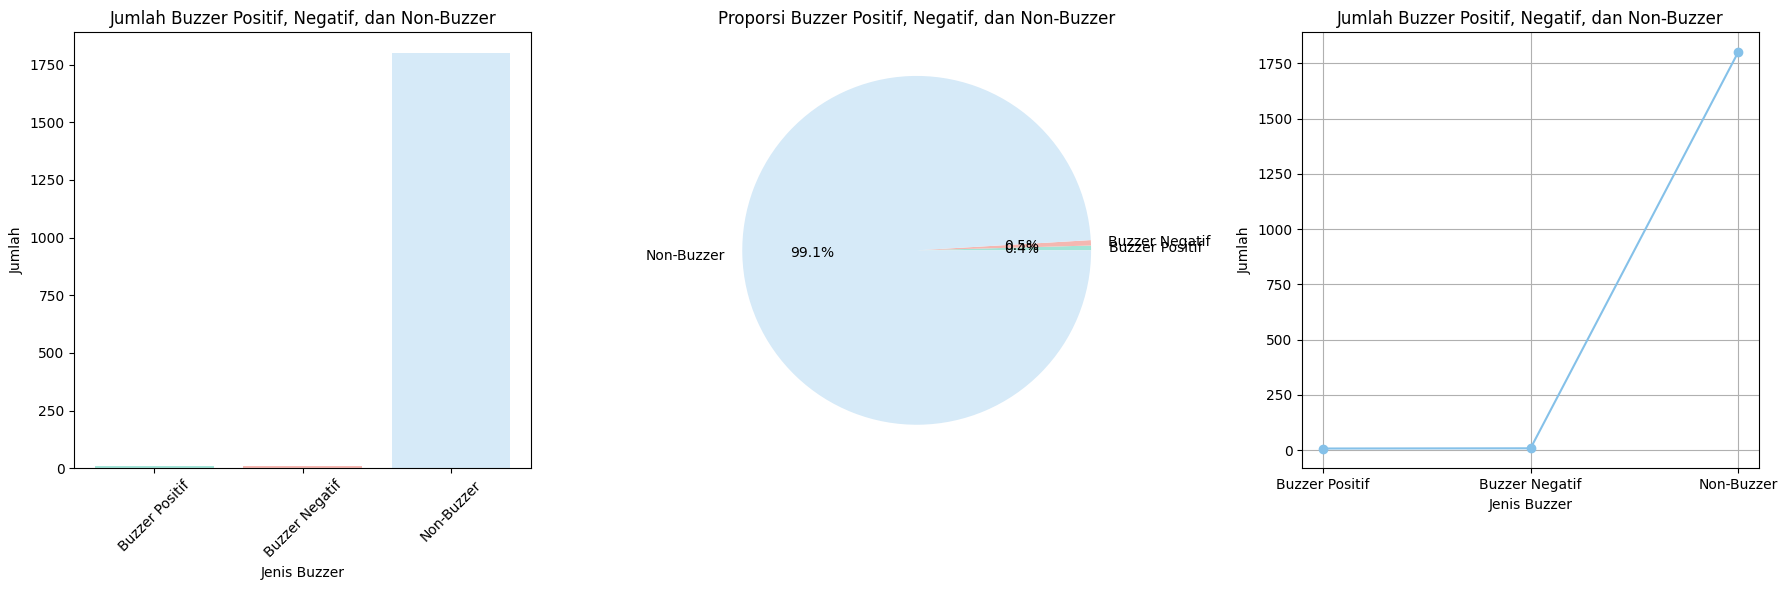

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV yang sudah diberi label
labeled_df = pd.read_csv("combined_data_with_buzzer_type.csv")

# Menghitung jumlah 'buzzer positif', 'buzzer negatif', dan 'non-buzzer'
buzzer_count = labeled_df['buzzer_type'].value_counts()

# Membuat data untuk visualisasi
labels = ['Buzzer Positif', 'Buzzer Negatif', 'Non-Buzzer']
counts = [
    buzzer_count.get('buzzer positif', 0),
    buzzer_count.get('buzzer negatif', 0),
    buzzer_count.get('non-buzzer', 0)
]

# Warna yang lebih lembut
colors = ['#a3e4d7', '#f5b7b1', '#d6eaf8']

# Membuat figure dengan 3 subplots (dalam satu baris)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Diagram Batang
axes[0].bar(labels, counts, color=colors)
axes[0].set_xlabel('Jenis Buzzer')
axes[0].set_ylabel('Jumlah')
axes[0].set_title('Jumlah Buzzer Positif, Negatif, dan Non-Buzzer')
axes[0].tick_params(axis='x', rotation=45)

# Diagram Pie
axes[1].pie(counts, labels=labels, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Proporsi Buzzer Positif, Negatif, dan Non-Buzzer')

# Diagram Garis
axes[2].plot(labels, counts, marker='o', linestyle='-', color='#85c1e9')
axes[2].set_xlabel('Jenis Buzzer')
axes[2].set_ylabel('Jumlah')
axes[2].set_title('Jumlah Buzzer Positif, Negatif, dan Non-Buzzer')
axes[2].grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()


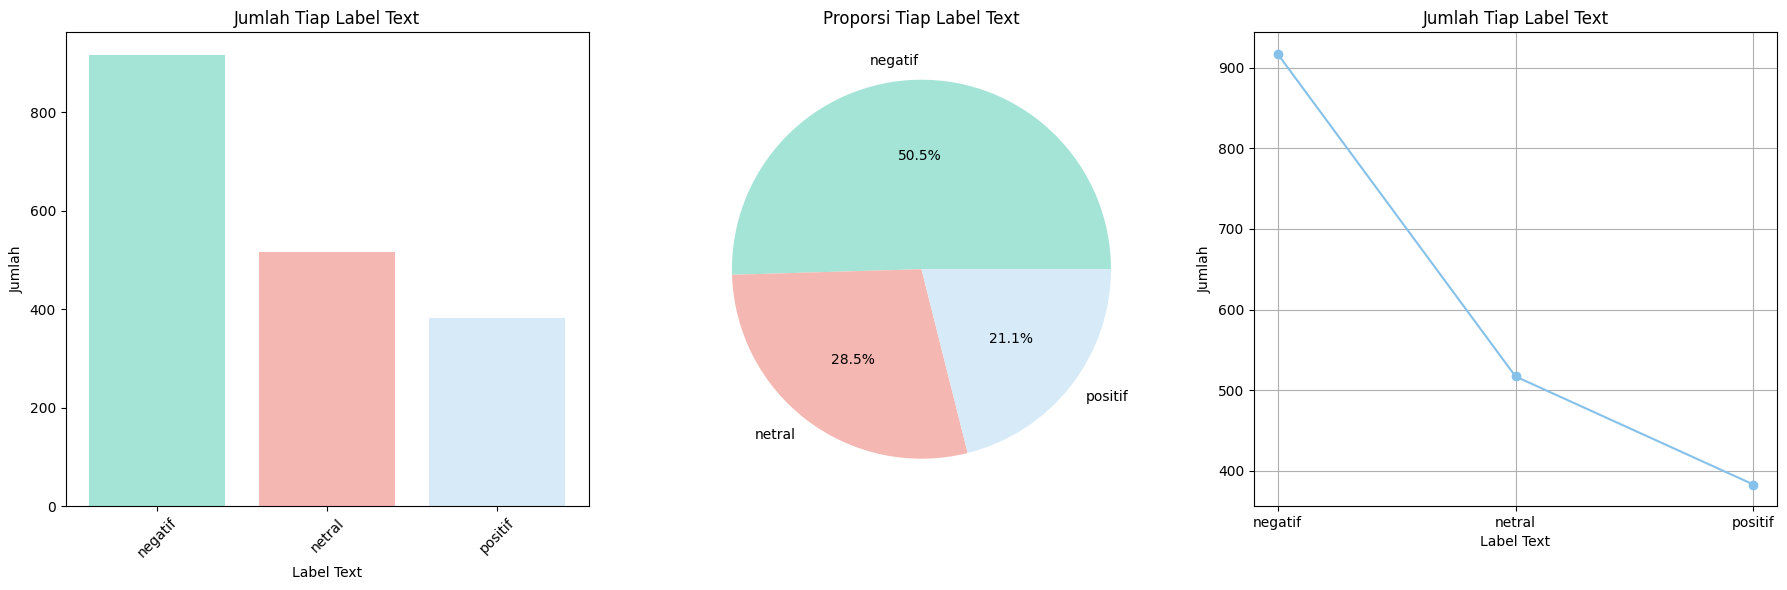

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV yang sudah diberi label
labeled_df = pd.read_csv("combined_data_with_buzzer_type.csv")

# Menghitung jumlah tiap label_text
label_count = labeled_df['label_text'].value_counts()

# Membuat data untuk visualisasi
labels = label_count.index.tolist()
counts = label_count.values.tolist()

# Warna yang lebih lembut
colors = ['#a3e4d7', '#f5b7b1', '#d6eaf8', '#f7d6e0']

# Membuat figure dengan 3 subplots (dalam satu baris)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Diagram Batang
axes[0].bar(labels, counts, color=colors)
axes[0].set_xlabel('Label Text')
axes[0].set_ylabel('Jumlah')
axes[0].set_title('Jumlah Tiap Label Text')
axes[0].tick_params(axis='x', rotation=45)

# Diagram Pie
axes[1].pie(counts, labels=labels, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Proporsi Tiap Label Text')

# Diagram Garis
axes[2].plot(labels, counts, marker='o', linestyle='-', color='#85c1e9')
axes[2].set_xlabel('Label Text')
axes[2].set_ylabel('Jumlah')
axes[2].set_title('Jumlah Tiap Label Text')
axes[2].grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()
